In [2]:
import pandas as pd

# Load your file
df = pd.read_csv("/content/drive/MyDrive/amazon.csv")

# Check the first few rows
print(df.head())
print(df.info())


   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%  

In [3]:
import pandas as pd

# Keep only useful columns
df_clean = df[['product_id','product_name','category',
               'discounted_price','actual_price','discount_percentage',
               'rating','rating_count']].copy()

# Remove ₹, commas, % and convert to float
for col in ['discounted_price','actual_price']:
    df_clean[col] = df_clean[col].str.replace("₹","", regex=False)
    df_clean[col] = df_clean[col].str.replace(",","", regex=False)
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

df_clean['discount_percentage'] = df_clean['discount_percentage'].str.replace("%","", regex=False)
df_clean['discount_percentage'] = pd.to_numeric(df_clean['discount_percentage'], errors='coerce')

df_clean['rating'] = pd.to_numeric(df_clean['rating'], errors='coerce')

df_clean['rating_count'] = df_clean['rating_count'].str.replace(",","", regex=False)
df_clean['rating_count'] = pd.to_numeric(df_clean['rating_count'], errors='coerce')


In [4]:
import numpy as np

# Assign random dates in 2023–2024
date_range = pd.date_range(start="2023-01-01", end="2024-12-31", periods=len(df_clean))
df_clean['date'] = date_range


In [5]:
df_clean.to_csv("amazon_sales_clean.csv", index=False)


In [6]:
import pandas as pd

# Load the cleaned dataset again
df_clean = pd.read_csv("amazon_sales_clean.csv")

# Generate a proper date range (e.g., 2022-01-01 to 2024-12-31)
date_range = pd.date_range(start="2022-01-01", end="2024-12-31", periods=len(df_clean))

# Assign these dates
df_clean['date'] = date_range

# Save again
df_clean.to_csv("amazon_sales_clean.csv", index=False)


In [7]:
import pandas as pd

df = pd.read_csv("/content/amazon_sales_clean.csv")

# Convert to datetime safely
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Keep only the date part (drop time and fractions)
df["date"] = df["date"].dt.date

# Save back
df.to_csv("amazon_sales_clean.csv", index=False)


In [8]:
import pandas as pd

df = pd.read_csv("/content/amazon_sales_clean.csv")

# parse to datetime safely
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")

# forward-fill missing dates
df["date"] = df["date"].fillna(method="ffill")

# export as YYYY-MM-DD
df["date"] = df["date"].dt.strftime("%Y-%m-%d")

df.to_csv("Amazon_sales_clean2.csv", index=False)





/tmp/ipython-input-1953872004.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["date"] = df["date"].fillna(method="ffill")


In [9]:
import pandas as pd

df = pd.read_csv("/content/Amazon_sales_clean2.csv")

# Parse day-first, then export as ISO format
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")
df["date"] = df["date"].dt.strftime("%Y-%m-%d")

df.to_csv("Amazon_sales_clean3.csv", index=False)


In [10]:
import pandas as pd

df = pd.read_csv("Amazon_sales_clean3.csv", on_bad_lines="skip")  # skips broken rows
print("Rows read:", len(df))
print(df.head())


Rows read: 1465
   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             399.0   
1  Computers&Accessories|Accessories&Peripherals|...             199.0   
2  Computers&Accessories|Accessories&Peripherals|...             199.0   
3  Computers&Accessories|Accessories&Peripherals|...             329.0   
4  Computers&Accessories|Accessories&Peripherals|...             154.0   

   actual_price  discount_percentage  rating  rating_count        date  
0        1099.0                   64     4.2       24269.

In [11]:
import pandas as pd

# load your data
df = pd.read_csv("Amazon_sales_clean3.csv")

# save a clean version with proper quoting
df.to_csv("Amazon_sales_final.csv", index=False, quoting=1)


In [12]:
import sqlite3
import pandas as pd

# Load CSV
df = pd.read_csv("Amazon_sales_clean3.csv")

# Create in-memory SQLite DB
conn = sqlite3.connect(":memory:")

# Write dataframe to SQL table
df.to_sql("amazon_sales", conn, index=False, if_exists="replace")

# Run queries
query = """
SELECT category, AVG(discounted_price) as avg_discounted
FROM amazon_sales
GROUP BY category
ORDER BY avg_discounted DESC
LIMIT 5;
"""
result = pd.read_sql(query, conn)
print(result)


                                            category  avg_discounted
0  Home&Kitchen|Heating,Cooling&AirQuality|AirCon...    42990.000000
1   Computers&Accessories|Laptops|TraditionalLaptops    37247.000000
2                      Computers&Accessories|Tablets    26999.000000
3  Electronics|HomeTheater,TV&Video|Televisions|S...    24840.190476
4  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...    23449.500000


In [13]:
import sqlite3, pandas as pd

# connect & create table if not already done
conn = sqlite3.connect(":memory:")
df.to_sql("amazon_sales", conn, index=False, if_exists="replace")

# run SQL properly
query = "SELECT COUNT(*) AS total_rows FROM amazon_sales;"
result = pd.read_sql(query, conn)
print(result)


   total_rows
0        1465


In [14]:
import pandas as pd
import sqlite3

# load your CSV
df = pd.read_csv("Amazon_sales_clean3.csv")

# create SQLite in-memory DB
conn = sqlite3.connect(":memory:")

# write dataframe into SQL table
df.to_sql("amazon_sales", conn, index=False, if_exists="replace")

# helper function to run queries
def run_sql(query):
    return pd.read_sql(query, conn)


In [15]:
run_sql("SELECT COUNT(*) AS total_rows FROM amazon_sales;")


,total_rows
0,1465


In [16]:
run_sql("""
SELECT category, AVG(rating) AS avg_rating
FROM amazon_sales
GROUP BY category
ORDER BY avg_rating DESC
LIMIT 10;
""")


,category,avg_rating
0,Computers&Accessories|Tablets,4.6
1,OfficeProducts|OfficeElectronics|Calculators|B...,4.5
2,HomeImprovement|Electrical|CordManagement,4.5
3,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.5
4,"Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...",4.5
5,Home&Kitchen|CraftMaterials|PaintingMaterials,4.5
6,Electronics|PowerAccessories|SurgeProtectors,4.5
7,Electronics|HomeAudio|MediaStreamingDevices|St...,4.5
8,Electronics|Cameras&Photography|Accessories|Film,4.5
9,Computers&Accessories|NetworkingDevices|Networ...,4.5


In [17]:
run_sql("""
SELECT product_name, rating_count
FROM amazon_sales
ORDER BY rating_count DESC
LIMIT 5;
""")


,product_name,rating_count
0,AmazonBasics Flexible Premium HDMI Cable (Blac...,426973.0
1,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",426973.0
2,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",426973.0
3,AmazonBasics Flexible Premium HDMI Cable (Blac...,426972.0
4,boAt Bassheads 100 in Ear Wired Earphones with...,363713.0


In [18]:
run_sql("""
SELECT strftime('%Y-%m', date) AS month, AVG(discounted_price) AS avg_price
FROM amazon_sales
GROUP BY month
ORDER BY month;
""")


,month,avg_price
0,2022-01,3142.895952
1,2022-02,3450.891892
2,2022-03,5680.050000
3,2022-04,5262.775000
4,2022-05,3611.046098
5,2022-06,3675.182500
6,2022-07,8471.581905
7,2022-08,5254.000000
8,2022-09,7752.400000
9,2022-10,6194.380952


In [19]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# load your CSV
df = pd.read_csv("Amazon_sales_clean3.csv")

# create SQLite in-memory DB
conn = sqlite3.connect(":memory:")
df.to_sql("amazon_sales", conn, index=False, if_exists="replace")

# helper function to run SQL
def run_sql(query):
    return pd.read_sql(query, conn)


/tmp/ipython-input-3987647466.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="category", x="avg_price", data=result, palette="viridis")


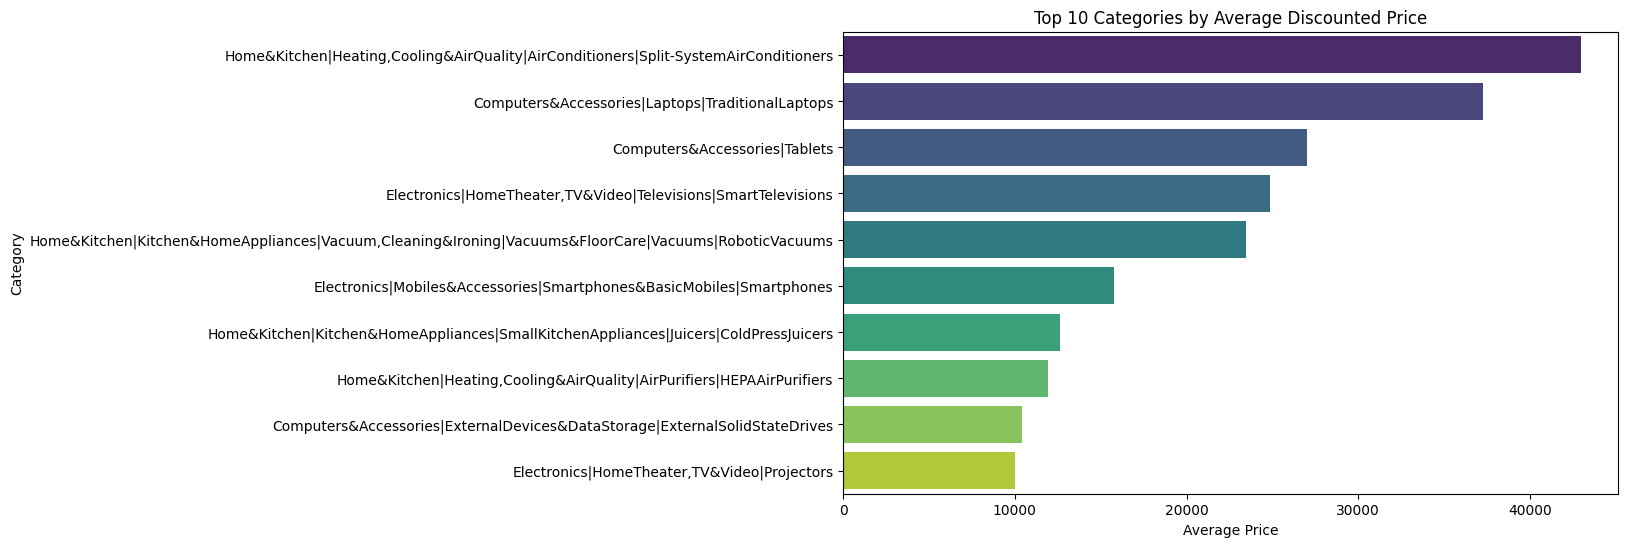

In [20]:
query = """
SELECT category, AVG(discounted_price) AS avg_price
FROM amazon_sales
GROUP BY category
ORDER BY avg_price DESC
LIMIT 10;
"""
result = run_sql(query)

plt.figure(figsize=(10,6))
sns.barplot(y="category", x="avg_price", data=result, palette="viridis")
plt.title("Top 10 Categories by Average Discounted Price")
plt.xlabel("Average Price")
plt.ylabel("Category")
plt.show()


/tmp/ipython-input-520135206.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="category", x="avg_rating", data=result, palette="coolwarm")


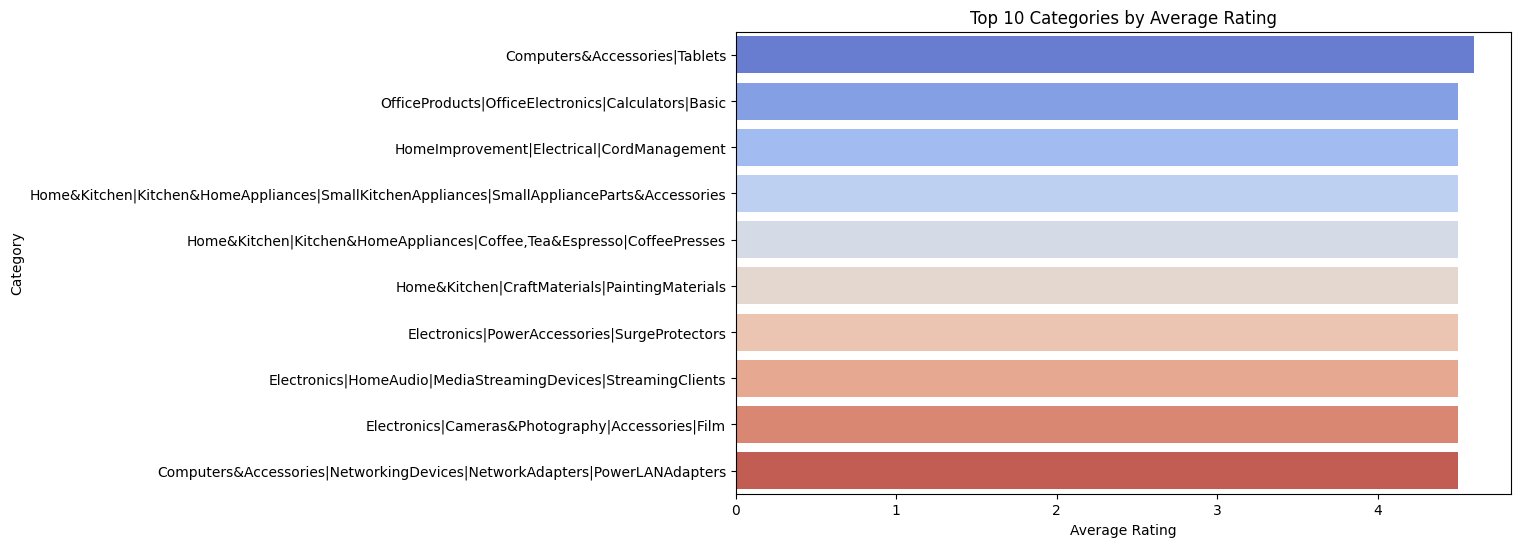

In [21]:
query = """
SELECT category, AVG(rating) AS avg_rating
FROM amazon_sales
GROUP BY category
ORDER BY avg_rating DESC
LIMIT 10;
"""
result = run_sql(query)

plt.figure(figsize=(10,6))
sns.barplot(y="category", x="avg_rating", data=result, palette="coolwarm")
plt.title("Top 10 Categories by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Category")
plt.show()


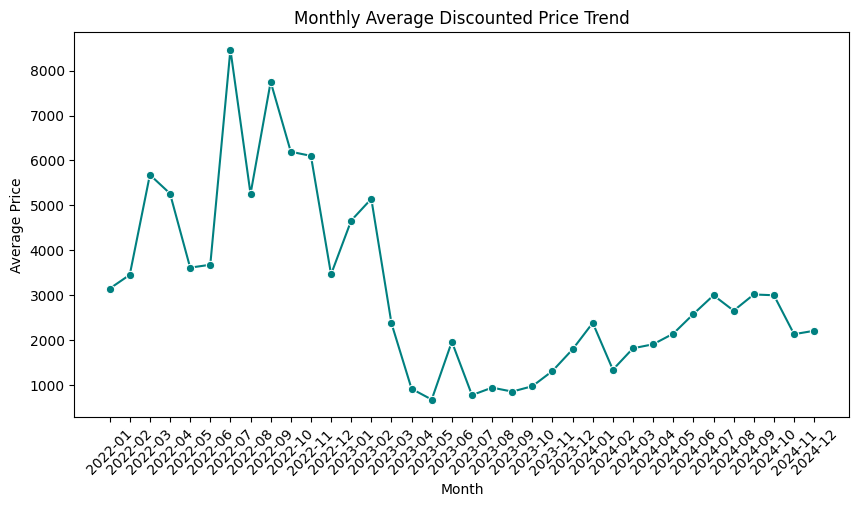

In [22]:
query = """
SELECT strftime('%Y-%m', date) AS month, AVG(discounted_price) AS avg_price
FROM amazon_sales
GROUP BY month
ORDER BY month;
"""
result = run_sql(query)

plt.figure(figsize=(10,5))
sns.lineplot(x="month", y="avg_price", data=result, marker="o", color="teal")
plt.title("Monthly Average Discounted Price Trend")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-1289847832.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="category", x="avg_price", data=result1, palette="viridis", ax=ax1)
/tmp/ipython-input-1289847832.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="product_name", x="rating_count", data=result2, palette="mako", ax=ax2)
/tmp/ipython-input-1289847832.py:70: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/tmp/ipython-input-1289847832.py:70: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/tmp/ipython-input-1289847832.py:70: UserWarning: Glyph 128176 (\N{MO

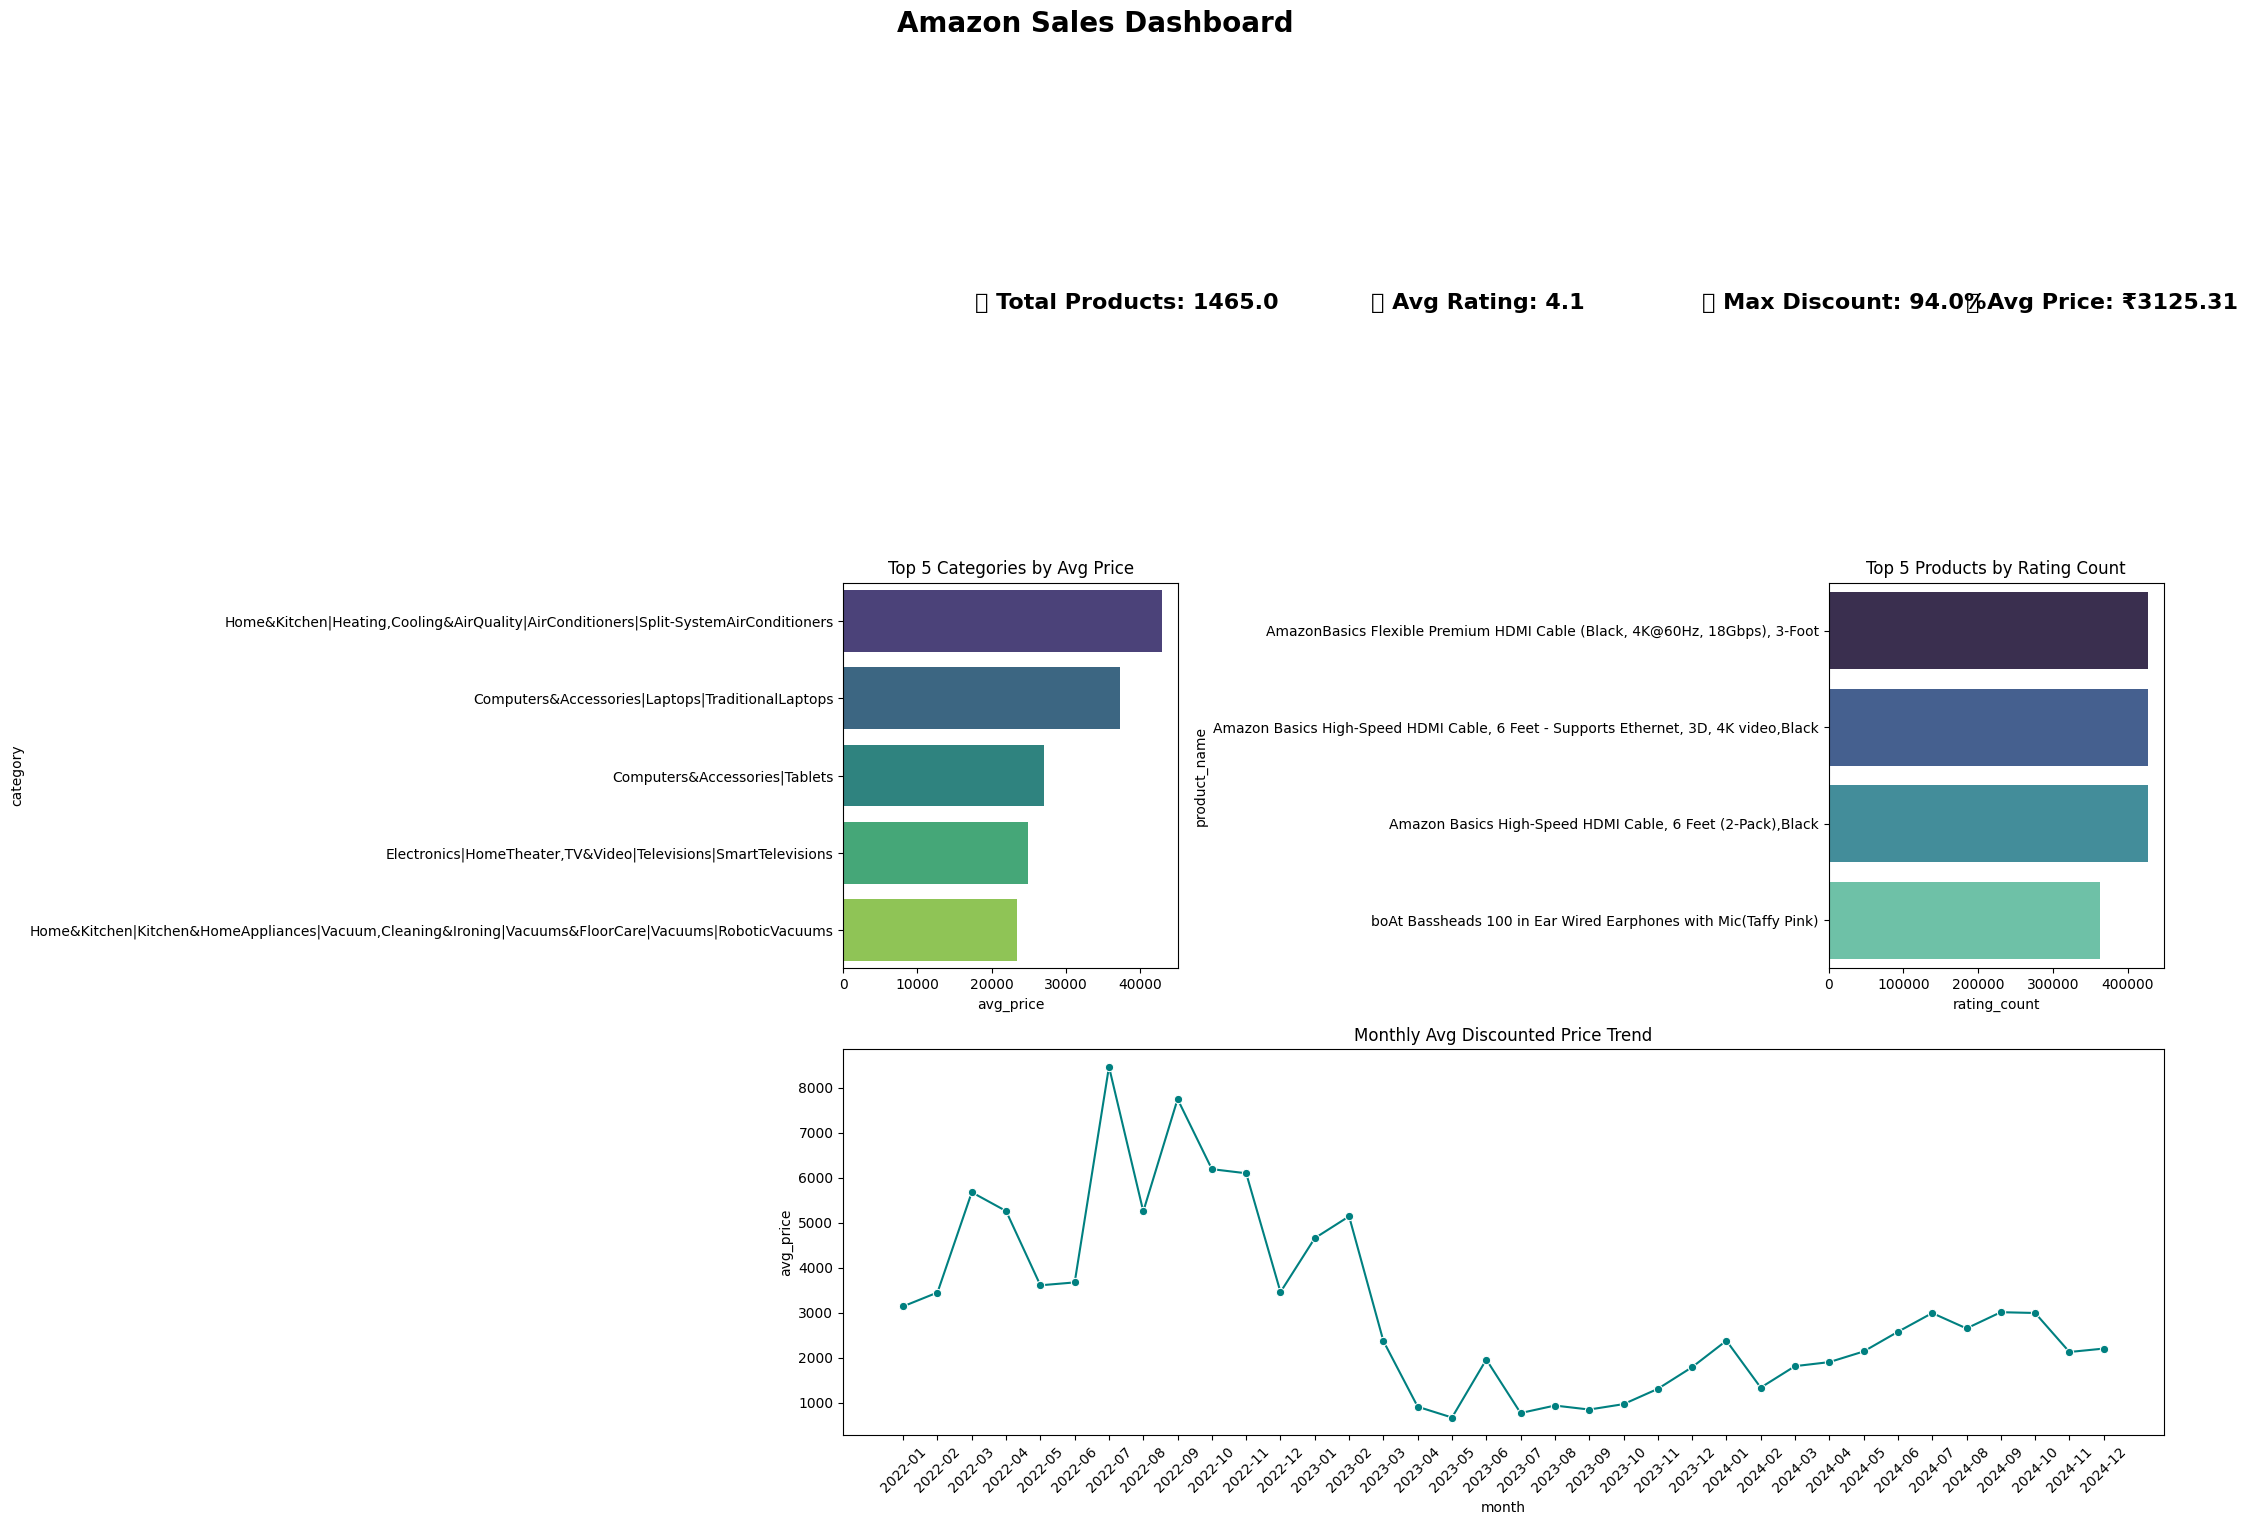

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------
# Compute KPIs
kpis = run_sql("""
SELECT
    COUNT(*) AS total_products,
    ROUND(AVG(rating),2) AS avg_rating,
    MAX(discount_percentage) AS max_discount,
    ROUND(AVG(discounted_price),2) AS avg_price
FROM amazon_sales;
""").iloc[0]

# Create dashboard layout
fig = plt.figure(figsize=(22, 16))
grid = fig.add_gridspec(3, 2)  # extra row for KPIs
fig.suptitle("Amazon Sales Dashboard", fontsize=20, fontweight="bold")

# --------------------------
# KPI Row (top full-width)
ax0 = fig.add_subplot(grid[0,:])
ax0.axis("off")  # hide axes
ax0.text(0.1, 0.5, f"📦 Total Products: {kpis.total_products}", fontsize=16, weight="bold")
ax0.text(0.4, 0.5, f"⭐ Avg Rating: {kpis.avg_rating}", fontsize=16, weight="bold")
ax0.text(0.65, 0.5, f"💰 Max Discount: {kpis.max_discount}%", fontsize=16, weight="bold")
ax0.text(0.85, 0.5, f"💵 Avg Price: ₹{kpis.avg_price}", fontsize=16, weight="bold")

# --------------------------
# Chart 1: Top Categories by Avg Price
ax1 = fig.add_subplot(grid[1,0])
query1 = """
SELECT category, AVG(discounted_price) AS avg_price
FROM amazon_sales
GROUP BY category
ORDER BY avg_price DESC
LIMIT 5;
"""
result1 = run_sql(query1)
sns.barplot(y="category", x="avg_price", data=result1, palette="viridis", ax=ax1)
ax1.set_title("Top 5 Categories by Avg Price")

# --------------------------
# Chart 2: Top Products by Ratings
ax2 = fig.add_subplot(grid[1,1])
query2 = """
SELECT product_name, rating_count
FROM amazon_sales
ORDER BY rating_count DESC
LIMIT 5;
"""
result2 = run_sql(query2)
sns.barplot(y="product_name", x="rating_count", data=result2, palette="mako", ax=ax2)
ax2.set_title("Top 5 Products by Rating Count")

# --------------------------
# Chart 3: Monthly Price Trend (full width bottom)
ax3 = fig.add_subplot(grid[2,:])
query3 = """
SELECT strftime('%Y-%m', date) AS month, AVG(discounted_price) AS avg_price
FROM amazon_sales
GROUP BY month
ORDER BY month;
"""
result3 = run_sql(query3)
sns.lineplot(x="month", y="avg_price", data=result3, marker="o", color="teal", ax=ax3)
ax3.set_title("Monthly Avg Discounted Price Trend")
ax3.tick_params(axis="x", rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [25]:
df[["actual_price", "discount_percentage", "rating", "rating_count", "category_encoded"]].isna().sum()



,0
actual_price,0
discount_percentage,0
rating,1
rating_count,2
category_encoded,0


In [26]:
df_clean = df.dropna(subset=["rating", "rating_count"])


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Features & target
X = df_clean[["actual_price", "discount_percentage", "rating", "rating_count", "category_encoded"]]
y = df_clean["discounted_price"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predictions
y_pred = reg_model.predict(X_test)

# Evaluate
print("R² Score:", r2_score(y_test, y_pred))
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)



R² Score: 0.9513908272668548
RMSE: 1191.4764837827504


In [29]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 0.9513908272668548
RMSE: 1191.4764837827504


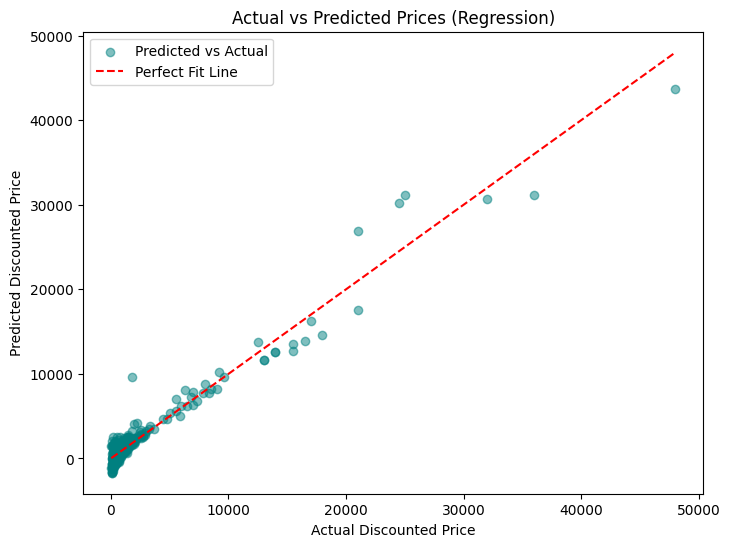

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color="teal", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", label="Perfect Fit Line")
plt.xlabel("Actual Discounted Price")
plt.ylabel("Predicted Discounted Price")
plt.title("Actual vs Predicted Prices (Regression)")
plt.legend()
plt.show()


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create binary target: 1 = high discount (>50%), 0 = low discount
df_clean["high_discount"] = (df_clean["discount_percentage"] > 50).astype(int)

# Features and target
X = df_clean[["actual_price", "rating", "rating_count", "category_encoded"]]
y = df_clean["high_discount"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/tmp/ipython-input-3493843508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["high_discount"] = (df_clean["discount_percentage"] > 50).astype(int)


In [33]:
# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)


In [34]:
print("🔹 Classification Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


🔹 Classification Results
Accuracy: 0.7679180887372014

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78       147
           1       0.80      0.72      0.76       146

    accuracy                           0.77       293
   macro avg       0.77      0.77      0.77       293
weighted avg       0.77      0.77      0.77       293



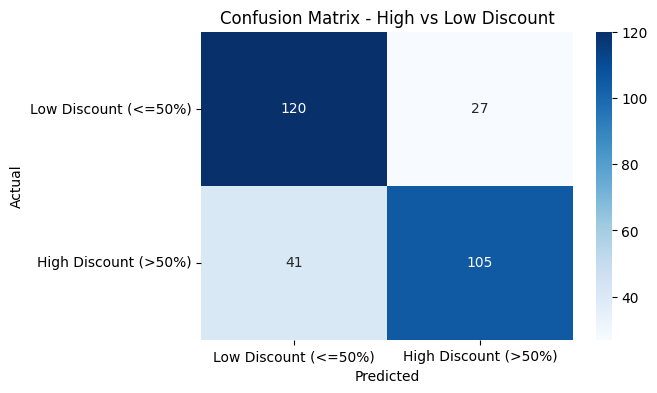

In [35]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Low Discount (<=50%)", "High Discount (>50%)"],
            yticklabels=["Low Discount (<=50%)", "High Discount (>50%)"])
plt.title("Confusion Matrix - High vs Low Discount")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


/tmp/ipython-input-68710571.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette="viridis")


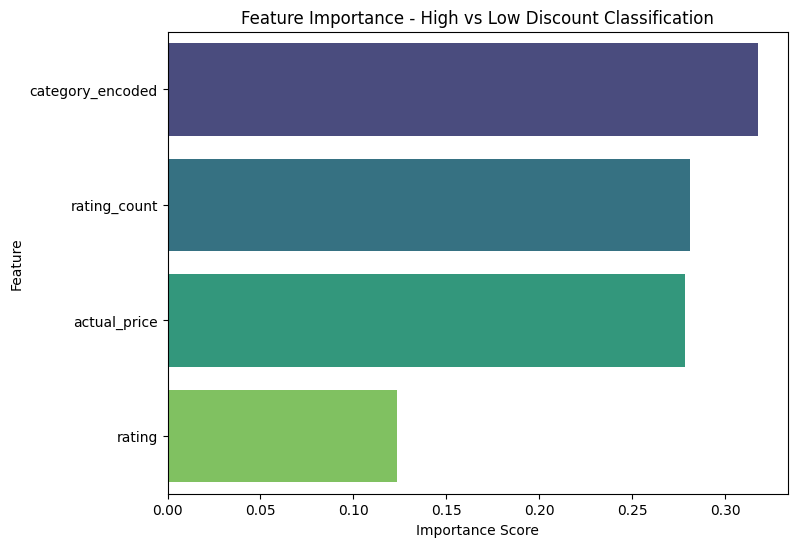

In [36]:
import numpy as np

# Get feature importances
importances = clf.feature_importances_
features = X.columns

# Sort by importance
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,6))
sns.barplot(x=importances[indices], y=features[indices], palette="viridis")
plt.title("Feature Importance - High vs Low Discount Classification")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [37]:
!pip install shap


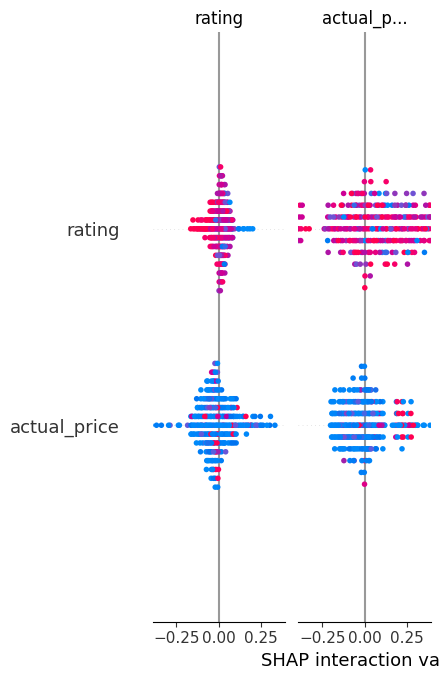

In [39]:
import shap

# Build explainer for the classifier
explainer = shap.TreeExplainer(clf)

# Compute shap values
shap_values = explainer.shap_values(X_test)

# If it's a list (multi-class output), pick the positive class (high discount = 1)
if isinstance(shap_values, list):
    shap_values_to_plot = shap_values[1]
else:  # if it's already a 2D numpy array
    shap_values_to_plot = shap_values

# Global feature importance
shap.summary_plot(shap_values_to_plot, X_test, feature_names=X.columns)



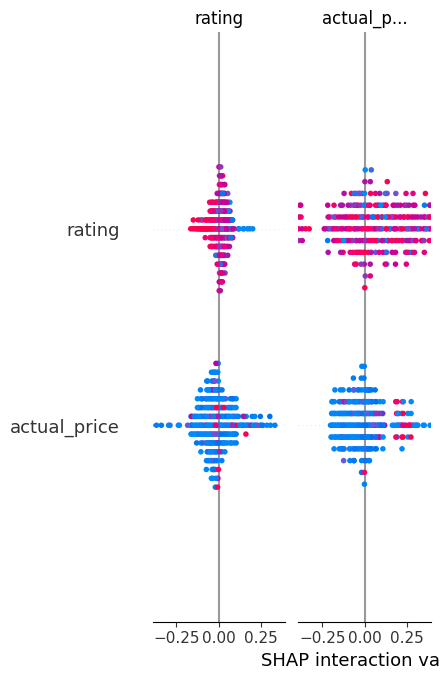

In [40]:
# Reverse mapping from LabelEncoder
category_mapping = dict(zip(df_clean["category_encoded"], df_clean["category"]))

# Replace encoded column with category names (for SHAP visualization)
X_test_copy = X_test.copy()
X_test_copy["category_encoded"] = X_test_copy["category_encoded"].map(category_mapping)

# Run SHAP summary again with readable category names
shap.summary_plot(shap_values_to_plot, X_test_copy, feature_names=X_test_copy.columns)


In [48]:
import pandas as pd

# Ensure date column is datetime
df["date"] = pd.to_datetime(df["date"])

# Aggregate monthly average discounted price
monthly = df.groupby("date")["discounted_price"].mean().resample("M").mean()
print(monthly.head())


date
2022-01-31     608.461451
2022-02-28    1403.212121
2022-03-31    8351.049691
2022-04-30    7306.846667
2022-05-31    3018.948365
Freq: ME, Name: discounted_price, dtype: float64


/tmp/ipython-input-2592163304.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.groupby("date")["discounted_price"].mean().resample("M").mean()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


🔮 Forecasted Prices (Next 6 Months):
2025-01-31    3608.152703
2025-02-28    3534.007102
2025-03-31    3484.053887
2025-04-30    3450.399514
2025-05-31    3427.725962
2025-06-30    3412.450386
Freq: ME, Name: predicted_mean, dtype: float64


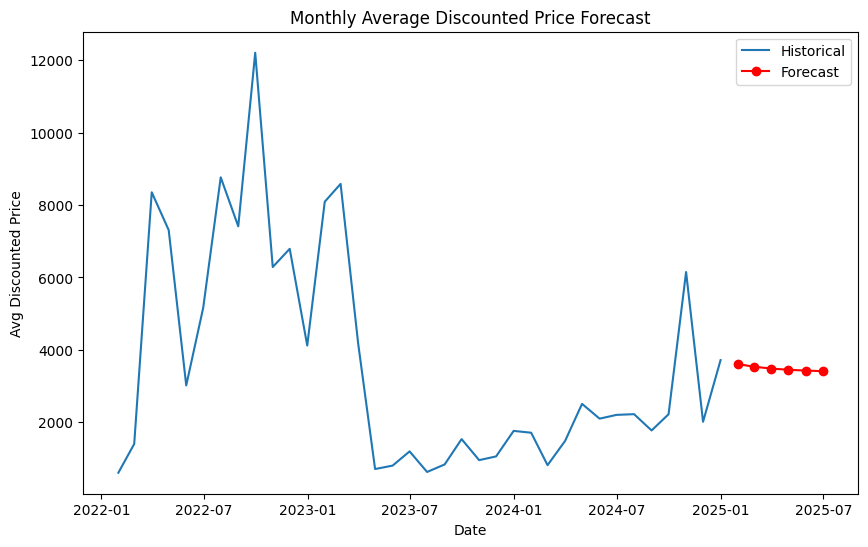

In [49]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit ARIMA model
model = ARIMA(monthly, order=(1,1,1))   # (p,d,q) → simple config
model_fit = model.fit()

# Forecast next 6 months
forecast = model_fit.forecast(steps=6)

# Show forecast values
print("🔮 Forecasted Prices (Next 6 Months):")
print(forecast)

# Plot historical vs forecast
plt.figure(figsize=(10,6))
plt.plot(monthly, label="Historical")
plt.plot(forecast, label="Forecast", color="red", marker="o")
plt.title("Monthly Average Discounted Price Forecast")
plt.xlabel("Date")
plt.ylabel("Avg Discounted Price")
plt.legend()
plt.show()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


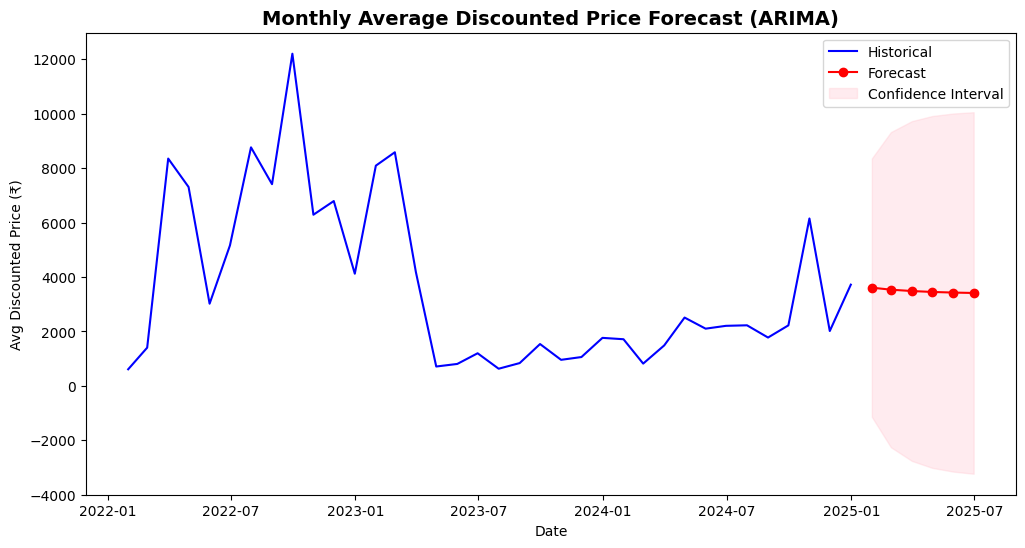

In [50]:
import matplotlib.pyplot as plt

# Fit ARIMA model again (in case you want full output with conf intervals)
model = ARIMA(monthly, order=(1,1,1))
model_fit = model.fit()

# Forecast with confidence intervals
forecast_result = model_fit.get_forecast(steps=6)
forecast_mean = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Plot
plt.figure(figsize=(12,6))
plt.plot(monthly, label="Historical", color="blue")
plt.plot(forecast_mean.index, forecast_mean, label="Forecast", color="red", marker="o")
plt.fill_between(conf_int.index, conf_int.iloc[:,0], conf_int.iloc[:,1],
                 color="pink", alpha=0.3, label="Confidence Interval")

plt.title("Monthly Average Discounted Price Forecast (ARIMA)", fontsize=14, fontweight="bold")
plt.xlabel("Date")
plt.ylabel("Avg Discounted Price (₹)")
plt.legend()
plt.show()
